In [1]:
!pip install split-folders

In [2]:
import splitfolders

In [3]:
splitfolders.ratio("/content/drive/MyDrive/Utensils-final/Raw", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 907 files [07:22,  2.05 files/s]


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [6]:
img = mping.imread("Spoon.jpg")

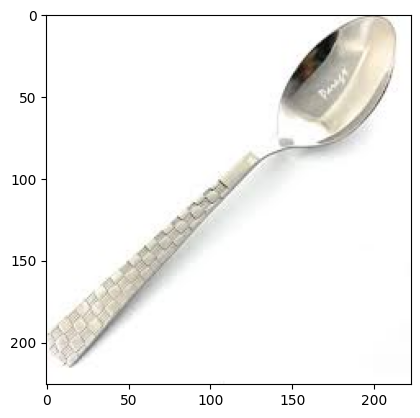

In [7]:
plt.imshow(img)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train = train_datagen.flow_from_directory("output/train/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 807 images belonging to 20 classes.


In [12]:
test = train_datagen.flow_from_directory("output/val/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 100 images belonging to 20 classes.


In [13]:
from tensorflow.keras.preprocessing import image

In [14]:
test_image = image.load_img('Spoon.jpg', target_size=(224,224))

In [15]:
test_image = image.img_to_array(test_image)

In [16]:
test_image = tf.expand_dims(test_image,axis=0)

In [17]:
test_image = test_image/255.

In [18]:
test_image.shape

TensorShape([1, 224, 224, 3])

In [19]:
import tensorflow_hub as hub

In [20]:
m = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"),
tf.keras.layers.Dense(20, activation='softmax')
])

In [21]:
m.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [22]:
history = m.fit(train,epochs=25,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test))

Epoch 1/25
26/26 [==============================] - 62s 2s/step - loss: 2.3660 - accuracy: 0.3296 - val_loss: 1.9202 - val_accuracy: 0.4300
Epoch 2/25
26/26 [==============================] - 53s 2s/step - loss: 1.4708 - accuracy: 0.6419 - val_loss: 1.4337 - val_accuracy: 0.6100
Epoch 3/25
26/26 [==============================] - 48s 2s/step - loss: 1.0620 - accuracy: 0.7732 - val_loss: 1.1486 - val_accuracy: 0.6700
Epoch 4/25
26/26 [==============================] - 48s 2s/step - loss: 0.8469 - accuracy: 0.8228 - val_loss: 1.1108 - val_accuracy: 0.6800
Epoch 5/25
26/26 [==============================] - 50s 2s/step - loss: 0.6979 - accuracy: 0.8476 - val_loss: 0.9090 - val_accuracy: 0.7500
Epoch 6/25
26/26 [==============================] - 48s 2s/step - loss: 0.6151 - accuracy: 0.8736 - val_loss: 0.8175 - val_accuracy: 0.8000
Epoch 7/25
26/26 [==============================] - 48s 2s/step - loss: 0.5384 - accuracy: 0.8984 - val_loss: 0.8060 - val_accuracy: 0.7700
Epoch 8/25
26/26 [==

In [23]:
classes=train.class_indices

In [24]:
classes=list(classes.keys())

In [25]:
m.predict(test_image)

1/1 [==============================] - 1s 1s/step


array([[7.5582968e-04, 1.0262523e-03, 3.1648804e-05, 2.6049960e-01,
        2.7983112e-03, 4.2228878e-04, 1.6678702e-03, 1.0189907e-05,
        3.9761513e-02, 2.1807540e-03, 1.2515255e-04, 2.7340252e-03,
        2.8323011e-05, 5.5413086e-02, 6.2961042e-01, 2.4788667e-04,
        9.6354354e-04, 9.2859947e-05, 7.4554897e-05, 1.5559061e-03]],
      dtype=float32)

In [26]:
classes[tf.argmax(m.predict(test_image),axis=1).numpy()[0]]

1/1 [==============================] - 0s 28ms/step


'SOUP_SPOON'

In [27]:
import pandas as pd

<Axes: >

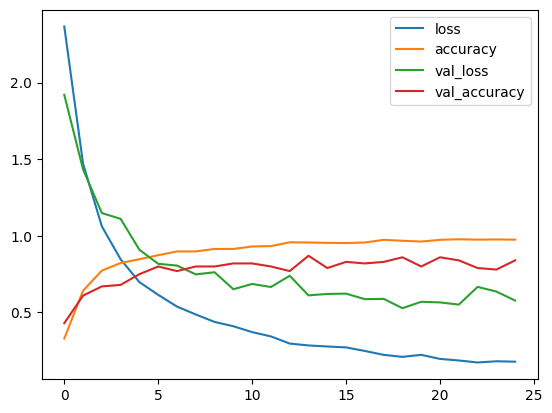

In [28]:
pd.DataFrame(history.history).plot()


In [29]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 20)                25620     
                                                                 
Total params: 4075184 (15.55 MB)
Trainable params: 25620 (100.08 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________
